In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def plot_grid(plots, figsize, row8col, margin=0.05):

    row_n, col_n = row8col
    plot_n = len(plots)
    w = (1 - margin) / col_n
    h = (1 - margin) / row_n
    l = b = margin

    plt.figure(figsize=figsize)
    
    graphs = [plt.axes([l+w*(i%col_n), 
              b+h*(i//col_n), 
              w, h])
              for i in range(plot_n)]

    for i in range(plot_n):
        graph, plot = graphs[i], plots[i]
        cond = len(plot.shape) > 2
        plot = plot.swapaxes(0, 1) if cond else plot
        x_pts = plot[..., 0]
        y_pts = plot[..., 1]
        graph.plot(x_pts, y_pts)
        graph.get_xaxis().set_visible(False)
        graph.get_yaxis().set_visible(False)
        graph.axis([-2, 2, -2, 2])
        
    plt.show()
  
    
def rotate(A, ro):
    sin, cos = np.sin, np.cos
    angle = np.pi/180*ro
    ro_mat = np.array(
        [cos(angle), -sin(angle), sin(angle), cos(angle)]
    ).reshape(2, 2)
    return A.dot(ro_mat)


def get_polygon(n):
    min_angle = np.pi*2/n
    sin, cos = np.sin, np.cos
    get_pts = (lambda i: [cos(min_angle*i), sin(min_angle*i)])
    polygon = np.array([get_pts(i) for i in range(n+1)])
    revision_angle = 180*(n-2)/(n*2)
    return rotate(polygon, revision_angle)


def get_random_polygons_plot():

    def get_polygon_(mo_vac):
        n_angle = np.random.randint(3, 7)
        A = get_polygon(n_angle)
        return A/4+np.array(mo_vac)
    
    n_polygon = np.random.randint(2, 7)
    mo_vacs = np.random.uniform(-1, 1, [n_polygon, 2])

    polygons = [get_polygon_(mo_vac) for mo_vac in mo_vacs]        
    max_angle = max(len(p) for p in polygons)

    for i in range(len(polygons)):
        polygon = polygons[i]
        padding = [polygon[-1]]*(max_angle-len(polygon))
        if padding:
            polygons[i] = np.concatenate([polygon, padding])

    return np.array(polygons)

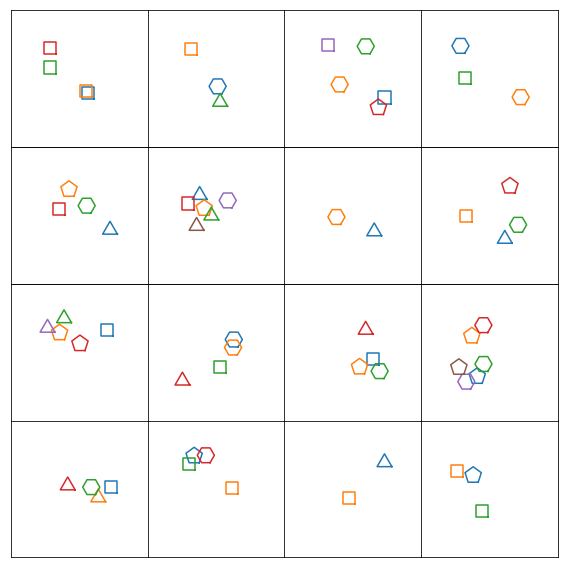

In [3]:
plots = [get_random_polygons_plot() for i in range(16)]
plot_grid(plots, [8, 8], [4, 4])